In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso,  LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import seaborn as sns

___
## Zadanie 1

In [2]:
# OLS (jedna zmienna)
def fit_simple_linear_regression(x: np.ndarray, y: np.ndarray):
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    x_mean = x.mean()
    y_mean = y.mean()
    Sxy = np.sum((x - x_mean) * (y - y_mean))
    Sxx = np.sum((x - x_mean) ** 2)
    b1 = Sxy / Sxx
    b0 = y_mean - b1 * x_mean
    return b0, b1

Estymowany b0: 3.0740
Estymowany b1: 2.0622

Prawdziwy model użyty do generacji danych:
y = 3.5 + 2.0 * x + N(0, 4.0)


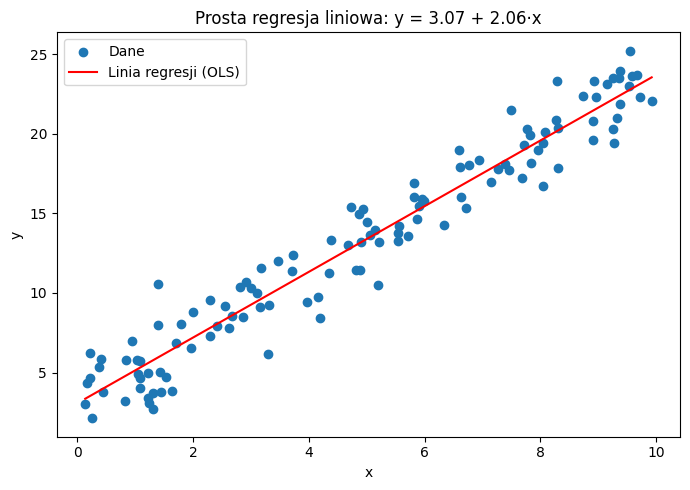

In [3]:
# Dane syntetyczne (y = a + b*x + szum)
rng = np.random.default_rng(42)
n = 120
a_true = 3.5
b_true = 2.0
sigma = 2.0
noise = rng.normal(0, sigma, size=n)
x = rng.uniform(0, 10, size=n)
y = a_true + b_true * x + noise

b0_hat, b1_hat = fit_simple_linear_regression(x, y)

y_hat = b0_hat + b1_hat * x

print(f"Estymowany b0: {b0_hat:.4f}")
print(f"Estymowany b1: {b1_hat:.4f}")
print()
print("Prawdziwy model użyty do generacji danych:")
print(f"y = {a_true} + {b_true} * x + N(0, {sigma**2})")


fig = plt.figure(figsize=(7, 5))
plt.scatter(x, y, label="Dane")
x_line = np.linspace(x.min(), x.max(), 200)
y_line = b0_hat + b1_hat * x_line
plt.plot(x_line, y_line, color="red", label="Linia regresji (OLS)")
plt.title(f"Prosta regresja liniowa: y = {b0_hat:.2f} + {b1_hat:.2f}·x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()


___
## Zadanie 2

,manual,sklearn,abs_diff
b0,3.074006,3.074006,3.552714e-15
b1,2.062192,2.062192,4.440892e-16


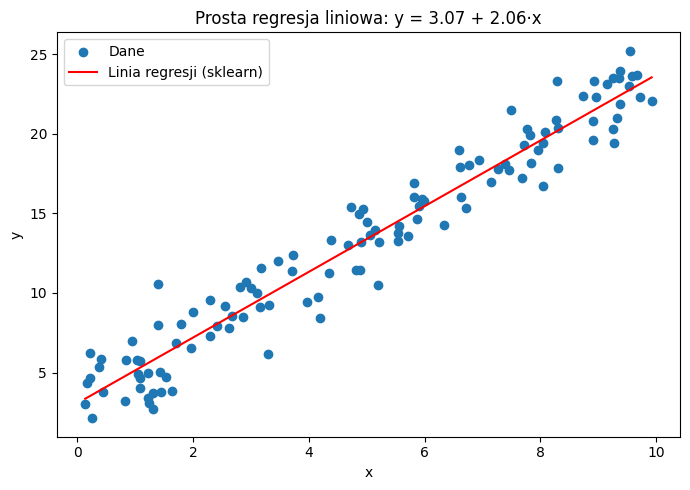

In [4]:
X_skl = x.reshape(-1, 1)
lr = LinearRegression()
lr.fit(X_skl, y)
y_hat_skl = lr.predict(X_skl)

coeffs_compare = pd.DataFrame({
    "manual": [b0_hat, b1_hat],
    "sklearn": [lr.intercept_, lr.coef_[0]],
    "abs_diff": [abs(b0_hat - lr.intercept_), abs(b1_hat - lr.coef_[0])]
}, index=["b0", "b1"])

display(coeffs_compare)

plt.figure(figsize=(7, 5))
plt.scatter(x, y, label="Dane")
x_line = np.linspace(x.min(), x.max(), 200)
plt.plot(x_line, lr.intercept_ + lr.coef_[0] * x_line, color="red", label="Linia regresji (sklearn)")
plt.title(f"Prosta regresja liniowa: y = {lr.intercept_:.2f} + {lr.coef_[0]:.2f}·x")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()

Boston Housing

funkcja potrzebna też w zad 3

In [5]:
def metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = float(np.sqrt(mse))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return dict(MSE=mse, RMSE=rmse, MAE=mae, R2=r2)

In [ ]:
df = pd.read_csv("Datasets/HousingData.csv")
df.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'HousingData.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,MSE,RMSE,MAE,R2
Test,31.454048,5.608391,3.367983,0.627085


,coef,abs_coef
NOX,-17.079257,17.079257
RM,4.258091,4.258091
CHAS,1.983837,1.983837
DIS,-1.424189,1.424189
PTRATIO,-0.975835,0.975835
LSTAT,-0.388620,0.388620
RAD,0.235588,0.235588
CRIM,-0.112187,0.112187
ZN,0.042440,0.042440
INDUS,0.025673,0.025673


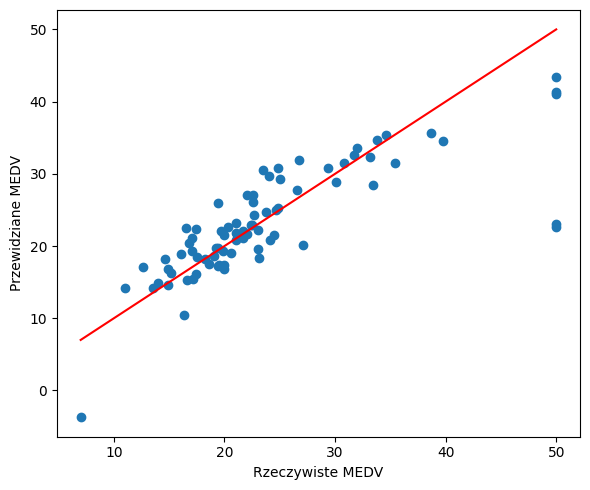

In [ ]:
y_boston = df["MEDV"].values
X_boston = df.drop(columns=["MEDV"])

mask = pd.notnull(X_boston).all(axis=1) & pd.notnull(df["MEDV"])
X_boston = X_boston.loc[mask]
y_boston = y_boston[mask.values]

X_train, X_test, y_train, y_test = train_test_split(
    X_boston, y_boston, test_size=0.2, random_state=42
)

model_boston = LinearRegression()
model_boston.fit(X_train, y_train)
y_pred_test = model_boston.predict(X_test)

metrics_boston = metrics(y_test, y_pred_test)
metrics_boston_df = pd.DataFrame([metrics_boston], index=["Test"])

coefs = pd.Series(model_boston.coef_, index=X_boston.columns, name="coef")
coefs_sorted = coefs.reindex(coefs.abs().sort_values(ascending=False).index)
coefs_df = pd.DataFrame({"coef": coefs_sorted, "abs_coef": coefs_sorted.abs()})

display(metrics_boston_df)
display(coefs_df)

# Wykres: y_test vs y_pred_test
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")
plt.xlabel("Rzeczywiste MEDV")
plt.ylabel("Przewidziane MEDV")
plt.tight_layout()
plt.show()


___
## Zadanie 3

In [ ]:
metrics_manual = metrics(y, y_hat)
metrics_skl = metrics(y, y_hat_skl)

metrics_compare = pd.DataFrame([metrics_manual, metrics_skl], index=["manual", "sklearn"])

display(metrics_compare)

,MSE,RMSE,MAE,R2
manual,4.785756e-30,2.187637e-15,1.835569e-15,1.0
sklearn,4.785756e-30,2.187637e-15,1.835569e-15,1.0


____
## Zadanie 4

,Model,Intercept,Coef
0,Linear,13.456257,5.444318
1,Ridge,13.456257,5.399324
2,Lasso,13.456257,5.344318


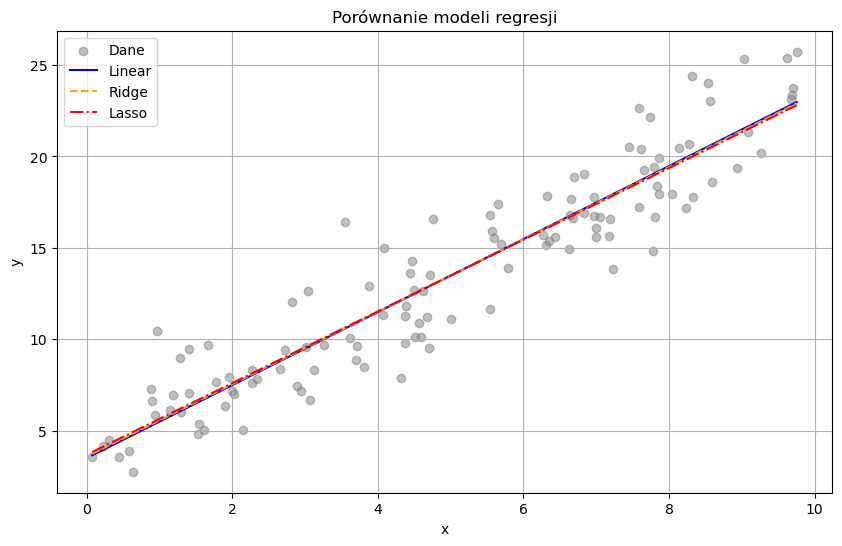

In [ ]:
X = x.reshape(-1, 1)
sigma2 = 5
new_noise = rng.normal(0, sigma2, size=n)
y = y + new_noise
# Standaryzacja (ważne dla Ridge i Lasso)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dopasowanie modeli
lr = LinearRegression().fit(X_scaled, y)
ridge = Ridge(alpha=1.0).fit(X_scaled, y)
lasso = Lasso(alpha=0.1).fit(X_scaled, y)

# Porównanie współczynników
coefs = pd.DataFrame({
    'Model': ['Linear', 'Ridge', 'Lasso'],
    'Intercept': [lr.intercept_, ridge.intercept_, lasso.intercept_],
    'Coef': [lr.coef_[0], ridge.coef_[0], lasso.coef_[0]]
})

display(coefs)

# Przewidywania
x_sorted = np.sort(x)
X_sorted_scaled = scaler.transform(x_sorted.reshape(-1, 1))

y_pred_lr = lr.predict(X_sorted_scaled)
y_pred_ridge = ridge.predict(X_sorted_scaled)
y_pred_lasso = lasso.predict(X_sorted_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='gray', alpha=0.5, label='Dane')
plt.plot(x_sorted, y_pred_lr, label='Linear', color='blue')
plt.plot(x_sorted, y_pred_ridge, label='Ridge', color='orange', linestyle = '--')
plt.plot(x_sorted, y_pred_lasso, label='Lasso', color='red', linestyle = '-.')
plt.title('Porównanie modeli regresji')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


___
## Zadanie 5

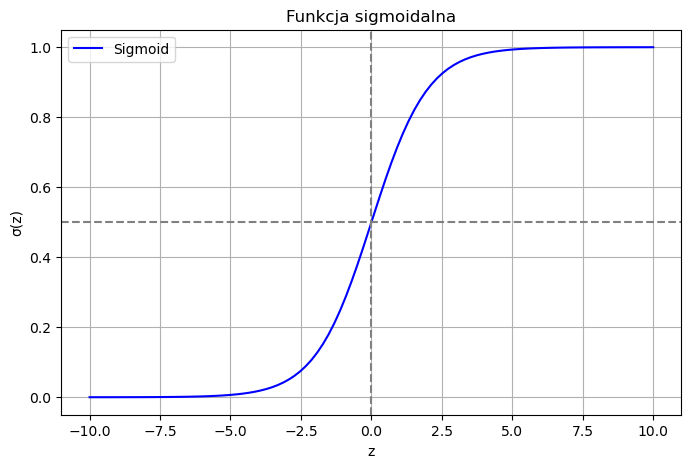

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
s = sigmoid(z)

plt.figure(figsize=(8, 5))
plt.plot(z, s, label='Sigmoid', color='blue')
plt.axvline(0, color='gray', linestyle='--')
plt.axhline(0.5, color='gray', linestyle='--')
plt.title('Funkcja sigmoidalna')
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.grid(True)
plt.legend()
plt.show()



Funkcja sigmoidalna przekształca wyjście modelu na wartość z przedziału (0, 1), umożliwiając interpretację jako prawdopodobieństwo.

Używana jest w regresji logistycznej, która jest podstawową techniką w klasyfikacji binarnej.

Jej kształt zapewnia gładkie przejście od klasy 0 do 1, co ułatwia optymalizację.

___ 
## Zadanie 6 

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

___
## Zadanie 7

Dokładność (accuracy): 0.9737
Precyzja (precision): 0.9722
Czułość (recall): 0.9859


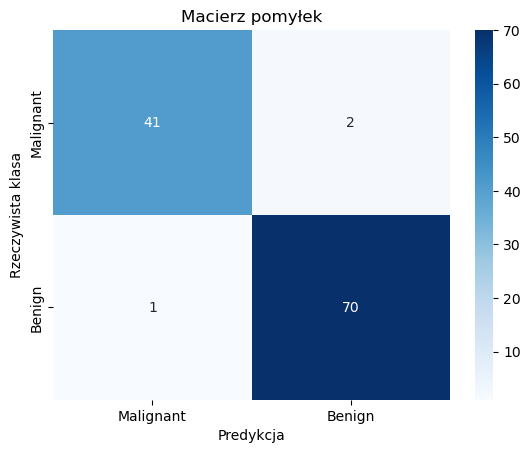

In [ ]:
# 1. Dokładność
accuracy = accuracy_score(y_test, y_pred)
print(f"Dokładność (accuracy): {accuracy:.4f}")

# 2. Precyzja
precision = precision_score(y_test, y_pred)
print(f"Precyzja (precision): {precision:.4f}")

# 3. Czułość
recall = recall_score(y_test, y_pred)
print(f"Czułość (recall): {recall:.4f}")

# 4. Macierz pomyłek
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Malignant', 'Benign'], yticklabels=['Malignant', 'Benign'])
plt.xlabel("Predykcja")
plt.ylabel("Rzeczywista klasa")
plt.title("Macierz pomyłek")
plt.show()